In [2]:
# from google.colab import files
# uploaded = files.upload()

#Importing Libraries

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import statsmodels.formula.api as smf





C:\Users\Lucyc\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


C:\Users\Lucyc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Lucyc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Lucyc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


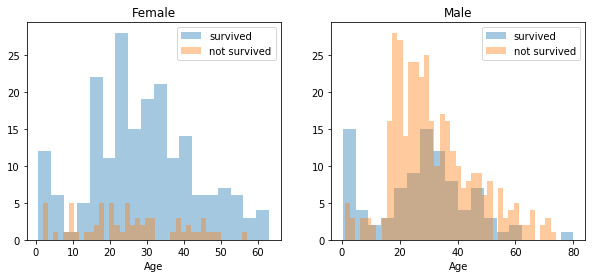

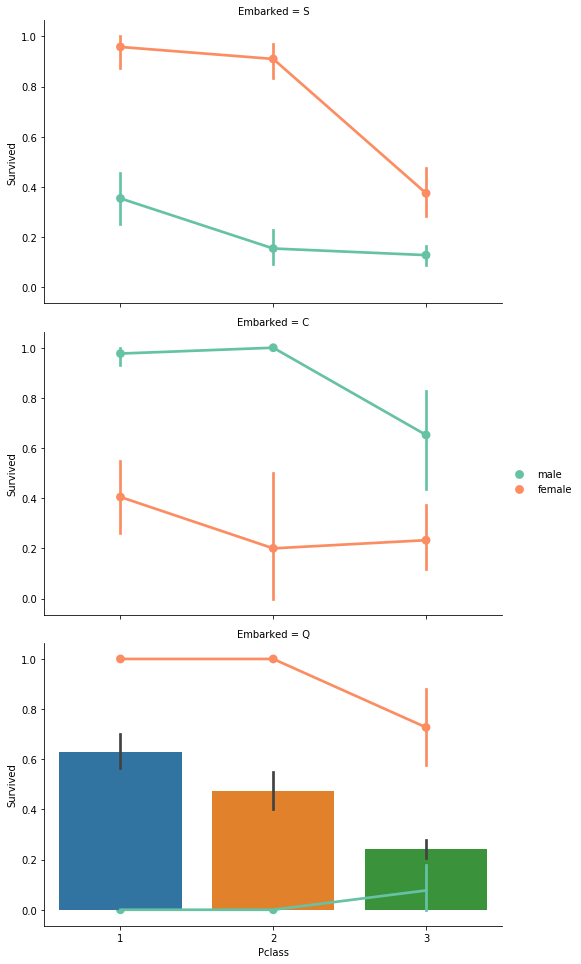

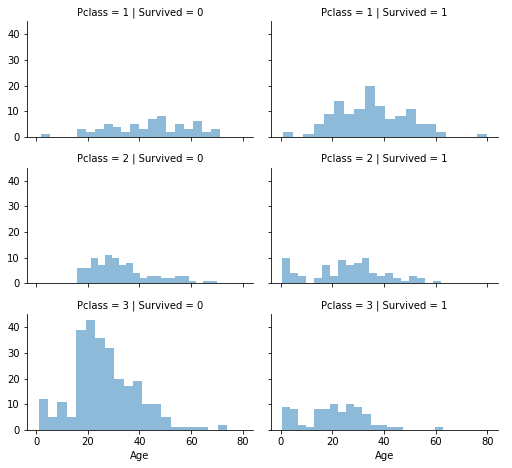

In [3]:
#Importing Data
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

#Exploratory Data Analysis
train_df.info()
train_df.describe()
train_df.head(8)
test_df.head()

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None , palette="Set2")
FacetGrid.add_legend()

sns.barplot(x='Pclass', y='Survived', data=train_df)

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [4]:
#Checking for missing data in train
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [5]:
#Checking for missing data in test
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
Embarked,0,0.0
Ticket,0,0.0


C:\Users\Lucyc\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lucyc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


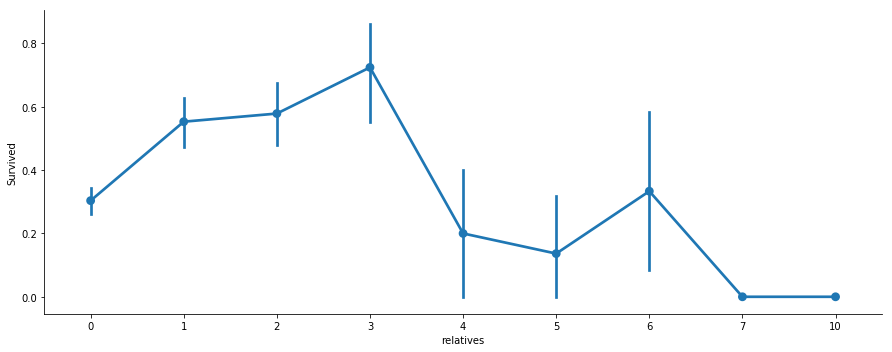

In [6]:
#Preprocessing begins
#Adding column not_alone

data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

In [7]:
#Removing column PassengerID
train_df = train_df.drop(['PassengerId'], axis=1)

In [8]:
#Adding column Deck, Removing column Cabin

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [9]:
#Filling in missing ages based on title

Title_list = pd.DataFrame(index=train_df.index, columns = ["Title"])
Surname_list = pd.DataFrame(index=train_df.index, columns = ["Surname"])
Name_list =list(train_df.Name)
n = [elem.split("\n") for elem in Name_list]
ctr = 0
for j in n:
    FullName = j[0]
    FullName = FullName.split(",")
    Surname_list.loc[ctr,"Surname"] = FullName[0]
    FullName = FullName.pop(1)
    FullName = FullName.split(".")
    FullName = FullName.pop(0)
    FullName = FullName.replace(" ","")
    Title_list.loc[ctr,"Title"] = str(FullName)
    ctr =ctr+1
Title_list.Title.value_counts()
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Sir",
    "Don": "Sir",
    "Dr":"Officer",
    "theCountess":"Lady",
    "Dona": "Lady", 
    "Mme":"Mrs",
    "Mlle":"Miss",
    "Ms":"Mrs"}
New_Titles = pd.DataFrame(index = train_df.index, columns = ["NEWTitle"])

count = 0
for j in Title_list.Title:
    if Title_Dictionary.__contains__(j):
        
        j = j.replace(j, Title_Dictionary[j])
        
    New_Titles.loc[count,"NEWTitle"] = j
    
    count = count + 1


New_Titles["Age"] = train_df.Age
New_Titles_dropNA = New_Titles[New_Titles.Age.notnull()]
New_Title_List = list(New_Titles_dropNA.NEWTitle.unique())

nl=[]
for j in range(len(New_Title_List)):
    nl.append(list(New_Titles_dropNA.Age[New_Titles_dropNA.NEWTitle == New_Title_List[j]]))
Age_median = [round(np.median(nl[j])) for j in range(len(nl))]
Title_Median_Age = dict(np.transpose([New_Title_List, Age_median]))
Age_Median_prediction=pd.DataFrame(data = [New_Titles.NEWTitle, train_df.Age],index=["Title","Age"]).T
for j in Title_Median_Age:
    Age_Median_prediction.loc[:,"Age"][(Age_Median_prediction.Age.isnull()) & (Age_Median_prediction.Title == j)] = float(Title_Median_Age[j])

test_df["Age"].fillna(Age_Median_prediction["Age"], inplace=True)
train_df["Age"].fillna(Age_Median_prediction["Age"], inplace=True)

In [10]:
#Filling in missing Embarked values

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [11]:
#Filling in missing Fare values

train_df["Fare"].fillna(method = 'ffill', inplace = True)
test_df["Fare"].fillna(method='ffill', inplace = True)

In [12]:
#Adding column Title

data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [13]:
#Converting Sex,Embarked to numeric values

genders = {"male": 0, "female": 1}
ports = {"S": 2, "C": 1, "Q": 0}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [14]:
#Removing column Ticket
#Adding column ticketsize

data = [train_df, test_df]
for dataset in data:
   
    dataset['ticketprefix'] = dataset.Ticket.str.replace(r'[^\w\s]+', '')
    dataset['ticketsize']=dataset.groupby('ticketprefix')['ticketprefix'].transform('size')
    dataset['ticketsize'] = dataset['ticketsize'].astype(int)
    dataset.loc[dataset['ticketsize'] > 1, 'not_alone'] = 0


train_df['not_alone'].value_counts()

train_df = train_df.drop(['Ticket'], axis=1)
train_df = train_df.drop(['ticketprefix'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['ticketprefix'], axis=1)

In [15]:
#Adding column NewAge

bins=[0,11,22,27,33,45,55,70,150]
train_df['NewAge'] = pd.cut(train_df.Age, bins, labels=[0,1,2,3,4,5,6,7])
test_df['NewAge'] = pd.cut(test_df.Age, bins, labels=[0,1,2,3,4,5,6,7])

In [16]:
#Adding column Fare_bin

train_df.head(10)
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare_bin'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare_bin'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare_bin']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare_bin']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare_bin']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare_bin'] = 5
    dataset['Fare_bin'] = dataset['Fare_bin'].astype(int)

In [17]:
#Adding column Age_Class -> Age*Class

data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [18]:
#Adding column Fare_per_person

data = [train_df, test_df]
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['ticketsize'])
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [19]:
print(train_df.head())
print(test_df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  relatives  \
0         0       3    0  22.0      1      0   7.2500         2          1   
1         1       1    1  38.0      1      0  71.2833         1          1   
2         1       3    1  26.0      0      0   7.9250         2          0   
3         1       1    1  35.0      1      0  53.1000         2          1   
4         0       3    0  35.0      0      0   8.0500         2          0   

   not_alone  Deck  Title  ticketsize NewAge  Fare_bin  Age_Class  \
0          0     8      1           1      1         0       66.0   
1          0     3      3           1      4         3       38.0   
2          1     8      2           1      2         1       78.0   
3          0     3      3           2      4         3       35.0   
4          1     8      1           1      4         1      105.0   

   Fare_Per_Person  
0                7  
1               71  
2                7  
3               26  
4          

In [20]:
#Separating the Train data and Target
training_data = train_df
X_test = test_df.drop('PassengerId', axis = 1)

X_train= train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']

Labels = test_df['PassengerId']

In [21]:
#Preprocessed final dataset
"""from google.colab import files

filename = 'Titanic_train_preprocessed.csv'

train_df.to_csv(filename,index=False)

files.download(filename)


filename1 = 'Titanic_test_preprocessed.csv'

test_df.to_csv(filename1,index=False)

files.download(filename1)
"""

"from google.colab import files\n\nfilename = 'Titanic_train_preprocessed.csv'\n\ntrain_df.to_csv(filename,index=False)\n\nfiles.download(filename)\n\n\nfilename1 = 'Titanic_test_preprocessed.csv'\n\ntest_df.to_csv(filename1,index=False)\n\nfiles.download(filename1)\n"

In [22]:
from sklearn.decomposition import PCA
#Principle component analysis
N_components = 14  # Define the number of principle components
Data_pca = PCA(n_components=N_components).fit(X_train)

In [23]:
#Feature Selection

# p-values
import statsmodels.formula.api as smf
model=smf.ols('Survived ~ Pclass + Sex + SibSp + Parch + Fare + Embarked + Age + relatives + Fare_bin + Age_Class + Fare_Per_Person + not_alone + Deck + Title + NewAge + ticketsize', train_df)
Fitting_results=model.fit()
print(Fitting_results.summary())
print('p-values are: ', Fitting_results.pvalues)

#lasso regularization

#ridge regularisation





                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     31.46
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           7.78e-92
Time:                        10:30:05   Log-Likelihood:                -370.02
No. Observations:                 891   AIC:                             784.0
Df Residuals:                     869   BIC:                             889.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9601      0.167     

In [24]:
#X = train_df[['Pclass','Sex','SibSp','Embarked','relatives','Deck','Title','Age']]
#Y = train_df['Survived']
#X_test = test_df[['Pclass','Sex','SibSp','Embarked','relatives','Deck','Title','Age']]
#Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
#Splitting the training data

feature_train = X_train[['Pclass','Sex','SibSp','Embarked','relatives','Deck','Title','Age']]

feature_test = X_test[['Pclass','Sex','SibSp','Embarked','relatives','Deck','Title','Age']]
x_train, x_test, y_train, y_test = train_test_split(feature_train, Y_train, random_state=0)

#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

#Stochastic Gradient Descent

#parameter tuning
best_score=0
los = ''
penal = ''
learn = ''
maxi = 0
loss = ['hinge','log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l2', 'l1', 'elasticnet']
learning = ['constant','optimal','invscaling']
max_iter = [1,10,50,100,500,100,1500,5000]
for i in loss:
  for j in penalty:
    for k in learning:
      for l in max_iter:
        sgd = linear_model.SGDClassifier(max_iter = l, learning_rate=k,penalty = j,loss=i, eta0 = 0.01,random_state=0).fit(X_train_scaled, y_train)

        score = sgd.score(X_test_scaled,y_test)
        if score > best_score:
          best_score = score
          los = i
          penal = j
          learn = k
          maxi = l
print('score= ', best_score)
print('lass= ',los,'penalty= ',penal,'learning= ',learn,'max_iter = ',maxi)


#Results:
#with feature selection and standardscaler scaling

#only default parameter - SVM - 75.78%
#param tuning - scaore=  84.75  - lass=  log penalty=  l2 learning=  optimal max_iter =  50   random state =0




score=  0.8475336322869955
lass=  log penalty=  l2 learning=  optimal max_iter =  50


In [26]:
scaler = StandardScaler()
scaler.fit(feature_train)
X_train_scaled = scaler.transform(feature_train)
X_test_scaled = scaler.transform(feature_test)
sgd = linear_model.SGDClassifier(max_iter = 50, loss='log', random_state=0).fit(X_train_scaled, Y_train)
Y_predict = sgd.predict(X_test_scaled)

submission = pd.DataFrame({'PassengerId':Labels,'Survived':Y_predict})
filename = 'Titanic_Predictions_sgd.csv'
submission.to_csv(filename,index=False)
print('Saved file: ',filename)
from google.colab import files
files.download('Titanic_Predictions_sgd.csv')

#score - 75.59

Saved file:  Titanic_Predictions_sgd.csv


ModuleNotFoundError: No module named 'google'

In [ ]:
#Logistic Regression with lasso
from sklearn.linear_model import LogisticRegression
C=[0.005, 0.001, 0.01, 0.1, 1, 10, 100]
best_score=0
for i in C:
  logreg = LogisticRegression(C=i).fit(x_train, y_train)
  score = logreg.score(x_test, y_test)
  if score > best_score:
    best_score = score
    C_parameter = i
print('C= ',C_parameter)
print('score = ', best_score)

In [ ]:
#Logistic Regression using all the features
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, random_state=0)

C=[0.005, 0.001, 0.01, 0.1, 1, 10, 100]
best_score=0
for i in C:
  logreg = LogisticRegression(C=i).fit(x_train, y_train)
  score = logreg.score(x_test, y_test)
  if score > best_score:
    best_score = score
    C_parameter = i
print('C= ',C_parameter)
print('score = ', best_score)

In [ ]:
!pip install lightgbm

In [ ]:
#Splitting the training data

feature_train = X_train[['Pclass','Sex','SibSp','Embarked','relatives','Deck','Title','Age']]

feature_test = X_test[['Pclass','Sex','SibSp','Embarked','relatives','Deck','Title','Age']]
x_train, x_test, y_train, y_test = train_test_split(feature_train, Y_train, random_state=0)

#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

#print(y_test)
d_train = lgb.Dataset(X_train_scaled, label=y_train)
best_score = 0
parameters = []
#lamba = [0.001, 0.01, 0.05, 0.1, 0.5, 1]
learning_rate = [0.15, 0.1, 0.05, 0.02, 0.01]
num_leaves = [i for i in range(12, 90, 6)]
n_estimators = [50, 200, 400, 600, 800]
boosting = ['gbdt','rf'] 
max_depth = [1,2,3,4,5,6,7,10]
for q in learning_rate:
  for j in num_leaves:
    for k in n_estimators:
      for n in max_depth:
            params = {}
            params['learning_rate'] = q
            params['boosting_type'] = 'gbdt'
            params['objective'] = 'binary'
            params['metric'] = 'binary_logloss'
            params['sub_feature'] = 0.5
            params['num_leaves'] = j
            params['min_data'] = 50
            params['max_depth'] = n
            
            clf = lgb.train(params, d_train, 100)
            y_pred=clf.predict(X_test_scaled)
#convert into binary values
            for i in range(y_pred.size):
              if y_pred[i]>=.5:      
                y_pred[i]=1
              else:  
                y_pred[i]=0

            accuracy=accuracy_score(y_pred,y_test)
            if accuracy > best_score:
              best_score = accuracy
              parameters = [q, j, k, n]
print(best_score)
print(parameters)

In [ ]:
x_train_all = train_df.drop('Survived', axis=1)
y_train_all = train_df['Survived']
x_test_all = test_df.drop('PassengerId', axis=1)
passenger_id_test = test_df['PassengerId']
print(x_train_all.head())

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_all)
X_train_scale = scaler.transform(x_train_all)
X_test_scale = scaler.transform(x_test_all)
print(X_train_scale)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# providing parameters


#fitting the model

clf = RandomForestClassifier(n_estimators=150, max_depth=10, criterion = 'gini', random_state=0).fit(X_train_scale, y_train_all)
      
print(clf.feature_importances_)

#title,sex, age_class, fare, age, fare per person, 

In [ ]:
#random forest trees
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# providing parameters
extracted_x_train = x_train_all[['Title','Sex','Age_Class','Fare','Age','Fare_Per_Person','Pclass','SibSp','Embarked','relatives','Deck']]
extracted_x_test = x_test_all[['Title','Sex','Age_Class','Fare','Age','Fare_Per_Person','Pclass','SibSp','Embarked','relatives','Deck']]
scaler = MinMaxScaler()
scaler.fit(extracted_x_train)
X_train_scale = scaler.transform(extracted_x_train)
X_test_scale = scaler.transform(extracted_x_test)
max_depth = [2, 3, 4, 5, 6, 7, 10]

n = [5, 10, 40, 50, 75, 100, 150]

best_score=0

#fitting the model
for i in max_depth:
  
    for k in n:
      clf = RandomForestClassifier(n_estimators=k, max_depth=i, criterion = 'gini', random_state=0)
      scores = cross_val_score(clf, extracted_x_train, y_train_all, cv=5)
      score = scores.mean()
#print(clf.feature_importances_)
#evaluatong the score
      if score > best_score:
        best_score=score
        max_depth=i
        model = clf
        n_estimator = k
#print(clf.feature_importances_)
print('max_depth= ',max_depth, ' n_estimators= ',n_estimator)
print('score = ', best_score)

In [ ]:
#submission Radom forest

clf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion = 'gini', random_state=0).fit(extracted_x_train,y_train_all)
Y_predict = clf.predict(extracted_x_test)

submission = pd.DataFrame({'PassengerId':Labels,'Survived':Y_predict})
filename = 'Titanic_Predictions_RF.csv'
submission.to_csv(filename,index=False)
print('Saved file: ',filename)
from google.colab import files
files.download('Titanic_Predictions_RF.csv')

# score = 

In [ ]:
#random forest trees
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#preparing the data

train
# providing parameters

max_depth = [2, 3, 4, 5, 6, 7, 10]

n = [5, 10, 40, 50, 75, 100, 150, 200, 500, 1000]

best_score=0

#fitting the model
for i in max_depth:
  
    for k in n:
      clf = RandomForestClassifier(n_estimators=k, max_depth=i, criterion = 'entropy', random_state=0)
      scores = cross_val_score(clf, X, Y, cv=5)
      score = scores.mean()
#print(clf.feature_importances_)
#evaluatong the score
      if score > best_score:
        best_score=score
        max_depth=i
        
        n_estimator = k
print('max_depth= ',max_depth, ' n_estimators= ',n_estimator)
print('score = ', best_score)

In [ ]:
##Predict live for all males titled “Master” whose entire family, excluding adult males, all live.
Title = 4 --> master
for i in test_df:
  
    


In [ ]:
features = ['Pclass','Sex','SibSp','Embarked','relatives','Deck','Title','Age']
target = ['Survived','Not Survived']
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(clf, out_file='tree.dot', 
                feature_names = features,
                class_names = target,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
#submission Radom forest - 'Pclass','Sex','SibSp','Embarked','relatives','Deck','Title','Age'
clf = RandomForestClassifier(n_estimators=50, max_depth=4, criterion = 'gini', random_state=0).fit(X,Y)
Y_predict = clf.predict(X_test)

submission = pd.DataFrame({'PassengerId':Labels,'Survived':Y_predict})
filename = 'Titanic_Predictions_RF.csv'
submission.to_csv(filename,index=False)
print('Saved file: ',filename)
from google.colab import files
files.download('Titanic_Predictions_RF.csv')

# score = 78.947% - HIGHEST

In [ ]:
#submission Radom forest

clf = RandomForestClassifier(n_estimators=50, max_depth=5, criterion = 'entropy', random_state=0).fit(X,Y)
Y_predict = clf.predict(X_test)

submission = pd.DataFrame({'PassengerId':Labels,'Survived':Y_predict})
filename = 'Titanic_Predictions_RF.csv'
submission.to_csv(filename,index=False)
print('Saved file: ',filename)
from google.colab import files
files.download('Titanic_Predictions_RF.csv')

# score = 78.947% 

In [ ]:
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)
from sklearn import tree
C=[2,4,5,6,7,10, 20, 40]
#criterion = ['gini','entropy']
#n_estimator = [1,5,10, 20, 30, 40 ,60, 80, 100, 150]

best_score=0
for i in C:
  #for j in criterion:
    #for k in n_estimator:
      decisiontree = tree.DecisionTreeClassifier(max_depth = i)
      scores = cross_val_score(decisiontree, X, Y, cv=5)
      score = scores.mean()
  #score = decisiontree.score(x_test, y_test)
      if score > best_score:
        best_score=score
        max_depth=i
        criterion = j
        n = k
        
print('max_depth= ',max_depth, ' criterion= ',criterion,' n_estimators= ',n)
print('score = ', best_score)

In [ ]:
#adaboost
from sklearn.ensemble import adaBoostClassifier


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#Fitting different ML models

#Stochastic Gradient Descent

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X, Y)
Y_pred = sgd.predict(X_test)

submission = pd.DataFrame({'PassengerId':Labels,'Survived':Y_pred})
filename = 'Titanic_Predictions_SGD.csv'
submission.to_csv(filename,index=False)
print('Saved file: ',filename)
from google.colab import files
files.download('Titanic_Predictions_SGD.csv')

In [ ]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
Y_prediction = random_forest.predict(X_test)
      
submission = pd.DataFrame({'PassengerId':Labels,'Survived':Y_pred})
filename = 'Titanic_Predictions_RF.csv'
submission.to_csv(filename,index=False)
print('Saved file: ',filename)
from google.colab import files
files.download('Titanic_Predictions_RF.csv')

In [ ]:
#Random Forest 2

training_data = train_df
features_train = training_data.drop('Survived')
target_train = training_data['Survived']
features_test = test_df
rf_model=random_forest.fit(features_train, target_train)
Y_predict = rf_model.predict(features_test)
submission2 = pd.DataFrame({'PassengerId':int(features_test[:,1]),'Survived':Y_predict})
print(submission.head(2))
filename = 'Titanic_Predictions_RF2.csv'
submission.to_csv(filename,index=False)
print('Saved file: ',filename)

In [ ]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)
logreg = LogisticRegression(C=0.01) 
logreg.fit(X, Y)

Y_pred = logreg.predict(X_test)
      
submission = pd.DataFrame({'PassengerId':Labels,'Survived':Y_pred})
filename = 'Titanic_Predictions_Logreg1.csv'
submission.to_csv(filename,index=False)
print('Saved file: ',filename)
from google.colab import files
files.download('Titanic_Predictions_Logreg1.csv')

# accuracy = 77.990


In [ ]:
#logistic regression with pca
pca = PCA(n_components = 5).fit(X)
X_pca = pca.transform(X)
X_test_pca = pca.transform(X_test)
logreg = LogisticRegression(C=0.01) 
logreg.fit(X_pca, Y)

Y_pred = logreg.predict(X_test_pca)
      
submission = pd.DataFrame({'PassengerId':Labels,'Survived':Y_pred})
filename = 'Titanic_Predictions_Logreg_pca.csv'
submission.to_csv(filename,index=False)
print('Saved file: ',filename)
from google.colab import files
files.download('Titanic_Predictions_Logreg_pca.csv')

#accuracy = 0.7754

In [ ]:
#decision tree 
from sklearn import tree
decisiontree = tree.DecisionTreeClassifier().fit(X,Y)
Y_pred = decisiontree.predict(X_test)
      
submission = pd.DataFrame({'PassengerId':Labels,'Survived':Y_pred})
filename = 'Titanic_Predictions_DT.csv'
submission.to_csv(filename,index=False)
print('Saved file: ',filename)
from google.colab import files
files.download('Titanic_Predictions_DT.csv')

# accuracy = 71%

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean()       

In [ ]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X,Y)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

In [ ]:
#Stat Model to get P Values
import statsmodels.api as sm
from scipy import stats

print(X_train.shape)
print(Y_train.shape)


X= train_df.drop('Survived', axis = 1)
Y = train_df['Survived']

Test = test_df.drop('PassengerId', axis = 1)
Labels = test_df['PassengerId']


X = sm.add_constant(X_train)
model = sm.OLS(X.astype(float), Y_train.astype(float)).fit()

print(model.summary())

In [ ]:
adaptControl <- trainControl(method = "adaptive_cv",
                             number = 10, repeats = 10,
                             adaptive = list(min = 10, alpha = 0.05, 
                                             method = "gls", complete = TRUE),
                             search = "random")

cl <- makeCluster(6)  
registerDoParallel(cl)


t1=proc.time()
set.seed(2)
svm_lssvmRadial_Adapt = train(Survived ~ ., data = train_tf,
                                 method = "lssvmRadial", 
                                 trControl = adaptControl, 
                                 preProc = c("center", "scale"),
                                 metric = "Kappa",
                                 tuneLength = 90)
t2=proc.time()

svm_lssvmRadial_Adapt%>%predict(test_tf)%>%confusionMatrix(test_tf$Survived)


library(caret)
library(tidyverse)
library(doParallel)
cl <- makeCluster(5)  
registerDoParallel(cl)

t1=proc.time()
set.seed(2)
LogitBoost_Adapt = train(Survived ~ ., data = train_tf,method = "LogitBoost",trControl = adaptControl,
                         preProc = c("center", "scale"), metric = "Kappa",tuneLength = 540)


LogitBoost_Adapt%>%predict(test_tf)%>%confusionMatrix(test_tf$Survived)           